In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [3]:
#load data from datasets
data=load_digits()
x=data.data
y=data.target

In [4]:
#n_components can be a integer, or a percentage of varience which can be explained by certain number of features 
model=PCA(n_components=0.8,whiten=True)
model.fit(x)
#show the explained_variance
model.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ,
        69.51316559,  59.10852489,  51.88453911,  44.01510667,
        40.31099529,  37.0117984 ,  28.51904118,  27.32116981,
        21.90148814])

In [5]:
#show the ratio of variance each feature explains
model.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

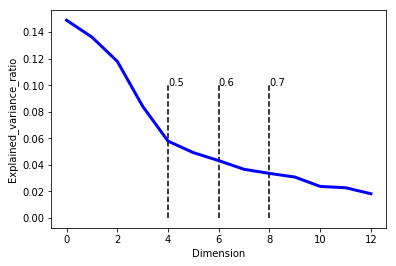

In [6]:
#plot the variance
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(model.explained_variance_ratio_,color="blue",linewidth=3)
ax.set(xlabel="Dimension",
      ylabel="Explained_variance_ratio")
#set the list of variance we want to use
varlist=[0.5,0.6,0.7]
#calculate the sum array of variance
var=np.cumsum(model.explained_variance_ratio_)
#return the relative dimensions
vls=np.array([np.argmax(var>i) for i in varlist])
#add points
for i, j in zip(vls,varlist):
    ax.text(i,0.1,j)
#add dashed_line
ax.vlines(vls,0.0,0.1,linestyles="dashed")

In [7]:
#show the number of components and features
print(f"number of components:{model.n_components_}",
      f"\nnumber of features:{model.n_features_}")

number of components:13 
number of features:64


In [8]:
#fit transform the data by PCA dimention reduction
x=model.fit_transform(x)

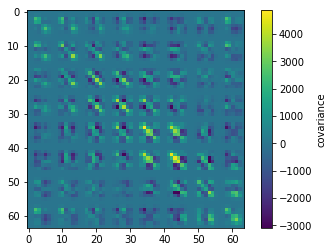

In [10]:
#display variance matrix
fig,ax=plt.subplots(figsize=(6,4))
im=ax.imshow(model.get_covariance())
fig.colorbar(im,label="covariance")

In [12]:
model=FactorAnalysis(n_components=10)

In [13]:
#display the transformed data
model.fit_transform(x)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
#display precision matrix
model.get_precision()

array([[ 1.00055679, -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ],
       [-0.        ,  1.00055679, -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ],
       [-0.        , -0.        ,  1.00055679, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ,  1.00055679, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        ,  1.00055679,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ],
       [-0.        , -0.      